<a href="https://colab.research.google.com/github/varuliant/foF2_Deep-Learning/blob/main_fo/Copy_of_foF2Forecast_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metoda forecasting foF2 hourly menggunakan RNN untuk digunakan dalam operasional pemilihan frekuensi PSO

Oleh : Varuliantor Dear, Tahun 2022

Input: Data ESIR Updated
Output Next foF2 ad fmin (Target); Saat ini: data CSV untuk latih

Insiasi Sistem


In [1]:
import os
import datetime
import io
import numpy as np
import pandas as pd
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
from keras import models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Siapkan data set untuk training (Dari CADI ESIR harapannya). Saat ini gunakan dulu data CSV dalam folder komputer dengan pengolahan data menggunakan numpy

In [2]:
# Get Data From Local Drive
from google.colab import files
uploaded = files.upload()


Saving foF2toPredict_komaUTF.csv to foF2toPredict_komaUTF.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['foF2toPredict_komaUTF.csv']), header=None)

# Dataset is now stored in a Pandas Dataframe
print(df2)

Read using Numpy and select specific column Ingat bahwa beda dengan matlab antara ( ) menjadi [ ] /n Ingat pula bahwa index python dimulai dari 0 beda dengan matlab

In [ ]:
foF2 =  np.genfromtxt('foF2toPredict_komaUTF.csv',delimiter=',',skip_header=0)
bar=foF2[32,:]
kol=foF2[:,95]
print(bar,kol)

In [ ]:
# Membuat semua data set menjadi perkolom
# cari length variabel k
len(foF2)
for i in range(len(foF2)):
  j=foF2[i,:]
print(foF2[i,:])


# loping for each element
(baris,kolom)=foF2.shape
for j in range(kolom):
  for i in range(baris):
    k=foF2[i][j] 
print(k)

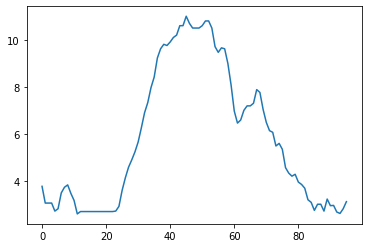

In [6]:
x=foF2[1,:]
fig=plt.figure
ax=plt.axes
plt.plot(x)

Seting format training data (single row)

In [7]:
x_train=[]
y_train=[]
for i in range(30, 96):
  y_train.append(x[i])
  x_train.append(x[i-30:i])

x_train, y_train=np.array(x_train), np.array(y_train)

#reshaping
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

Test susunan data training X dan/atau Y

In [ ]:
y_train

Definisikan model RNN

In [ ]:
model = keras.Sequential()
# Add a LSTM layer with 30 internal units.
model.add(layers.LSTM(30, activation='relu', input_shape=(30, 1)))

# Add a Dense layer with 64 units.
model.add(layers.Dense(64))
# Add a Dense layer with 128 units.
model.add(layers.Dense(128))
model.summary()

Compile Model yang dibangun, meliputi Optimizer dan probabilistic Loss yang digunakan 

In [24]:
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

Proses fiting model untuk training dan validasi. Epoch menentukan akurasi yang dapat dicapai dan proses over fiting yang dapat terjadi

In [ ]:
all_mse_histories = []
all_los_histories = []
all_tr_los=[]
all_tr_mse=[]
history=model.fit(x_train, y_train, epochs=30, validation_split=0.01, batch_size=3)#, callbacks=[WandbCallback()])
# Kumpulkan semua data fiting model
mse_history = history.history['val_mse']
los_history=history.history['val_loss']
tr_los=history.history['loss']
tr_mse=history.history['mse']
all_mse_histories.append(mse_history)
all_los_histories.append(los_history)
all_tr_los.append(tr_los)
all_tr_mse.append(tr_mse)


In [ ]:
history_dict = history.history   # Memeriksa fitur yang ada di history agar bisa dibuat plotnya
print(history_dict.keys())

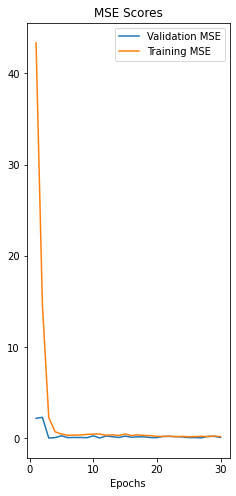

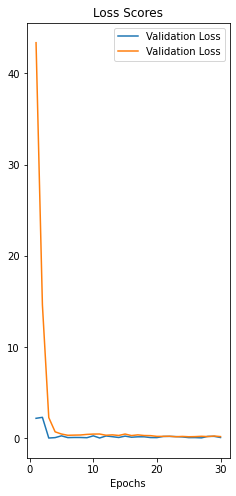

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_history) + 1), mse_history, label='Validation MSE')
plt.plot(range(1, len(tr_mse) + 1), tr_mse, label='Training MSE')
plt.xlabel('Epochs')
#plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('MSE Scores')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(los_history) + 1), los_history, label='Validation Loss')
plt.plot(range(1, len(tr_los) + 1), tr_los, label='Validation Loss')
plt.xlabel('Epochs')
#plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Loss Scores')
plt.show()

